In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [6]:
data_train_path = 'Fruits_Vegetables/Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/Fruits_Vegetables/validation'


In [7]:
img_width = 180
img_height = 180

In [8]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split=False
)


Found 3115 files belonging to 36 classes.


In [9]:
data_cat = data_train.class_names

In [10]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [11]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size = (img_height,img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [12]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                        image_size = (img_height,img_width),
                                                        shuffle=False,
                                                        batch_size=32,
                                                        validation_split=False)

Found 359 files belonging to 36 classes.


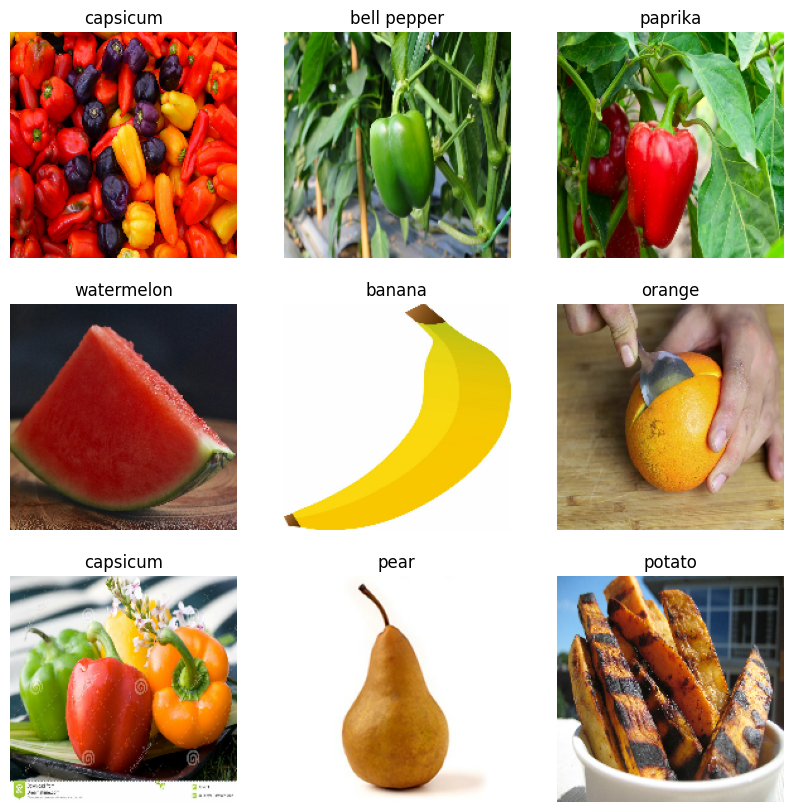

In [13]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense( len(data_cat))
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [19]:
epochs_size = 25
history = model.fit(data_train,validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - accuracy: 0.9866 - loss: 0.0432 - val_accuracy: 0.9516 - val_loss: 0.4680
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 373ms/step - accuracy: 0.9780 - loss: 0.1280 - val_accuracy: 0.9573 - val_loss: 0.4014
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 424ms/step - accuracy: 0.9807 - loss: 0.0909 - val_accuracy: 0.9487 - val_loss: 0.4576
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 423ms/step - accuracy: 0.9761 - loss: 0.1061 - val_accuracy: 0.9544 - val_loss: 0.4593
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 420ms/step - accuracy: 0.9767 - loss: 0.1290 - val_accuracy: 0.9487 - val_loss: 0.5471
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 444ms/step - accuracy: 0.9795 - loss: 0.0888 - val_accuracy: 0.9573 - val_loss: 0.5242
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 420ms/step - accuracy: 0.9825 - loss: 0.0827 - val_accuracy: 0.9544 - val_loss: 0.4716
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 435ms/step - accuracy: 0.9836 - loss: 0.0805 - val_accu

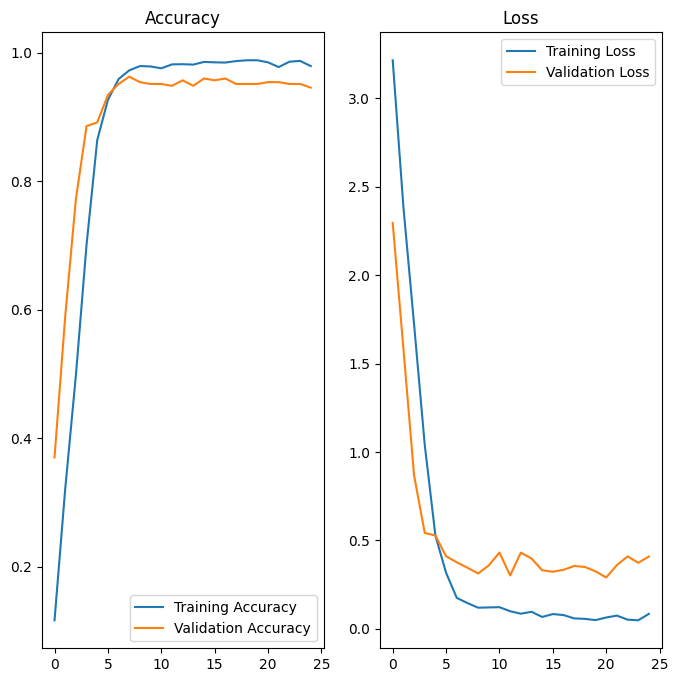

In [25]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, 1st plot)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, 2nd plot)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')  # Correct 'lose' to 'loss'
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [70]:
image = 'Papaya.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat= tf.expand_dims(img_arr,0)

In [71]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [72]:
score = tf.nn.softmax(predict)

In [73]:
print('Veg/Fruit in images is {} with accouracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in images is sweetpotato with accouracy of 41.52


In [74]:
model.save('Image_classify.keras')